In [6]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#load in the genre data
data_genre = pd.read_csv('MusicGenreRevealParty/autotagging_genre.csv')
data_genre.head()
#clean up names of genres
for genre in ('GENRE_1', 'GENRE_2', 'GENRE_3', 'GENRE_4', 'GENRE_5'):
    data_genre[genre] = data_genre[genre].str[8:]
#see all unique genres there are
all_genres = data_genre['GENRE_1'].unique()
for genre in all_genres:
    print(genre)
#these genres are so specific, i need to group them into broader categories
#please note that generative AI was used to help me come up with these groupings
genre_map = {
    # rock_punk
    "rock": "rock_punk",
    "punkrock": "rock_punk",
    "alternativerock": "rock_punk",
    "poprock": "rock_punk",
    "hardrock": "rock_punk",
    "classicrock": "rock_punk",
    "bluesrock": "rock_punk",
    "postrock": "rock_punk",
    "newwave": "rock_punk",
    "grunge": "rock_punk",
    "psychedelic": "rock_punk",
    "indie": "rock_punk",
    "alternative": "rock_punk",
    "hard": "rock_punk",
    "rocknroll": "rock_punk",
    "instrumentalrock": "rock_punk",

    # metal
    "metal": "metal",
    "heavymetal": "metal",
    "industrial": "metal",
    "progressive": "metal",
    "symphonic": "metal",
    "gothic": "metal",
    "darkwave": "metal",

    # pop
    "pop": "pop",
    "electropop": "pop",
    "synthpop": "pop",
    "popfolk": "pop",
    "poprock": "pop",
    "instrumentalpop": "pop",
    "dance": "pop",
    "disco": "pop",

    # electronic_edm
    "electronic": "electronic_edm",
    "edm": "electronic_edm",
    "house": "electronic_edm",
    "deephouse": "electronic_edm",
    "techno": "electronic_edm",
    "trance": "electronic_edm",
    "dubstep": "electronic_edm",
    "eurodance": "electronic_edm",
    "club": "electronic_edm",
    "electronica": "electronic_edm",
    "minimal": "electronic_edm",
    "idm": "electronic_edm",
    "breakbeat": "electronic_edm",
    "drumnbass": "electronic_edm",

    # hiphop_rap
    "hiphop": "hiphop_rap",
    "rap": "hiphop_rap",
    "triphop": "hiphop_rap",

    # jazz_fusion
    "jazz": "jazz_fusion",
    "acidjazz": "jazz_fusion",
    "jazzfunk": "jazz_fusion",
    "jazzfusion": "jazz_fusion",
    "swing": "jazz_fusion",
    "fusion": "jazz_fusion",
    "improvisation": "jazz_fusion",
    "blues": "jazz_fusion",
    "bossanova": "jazz_fusion",

    # ambient_chill
    "ambient": "ambient_chill",
    "darkambient": "ambient_chill",
    "chillout": "ambient_chill",
    "downtempo": "ambient_chill",
    "lounge": "ambient_chill",
    "atmospheric": "ambient_chill",
    "newage": "ambient_chill",
    'easylistening': "ambient_chill",

    # funk_soul_rnb
    "funk": "funk_soul_rnb",
    "soul": "funk_soul_rnb",
    "rnb": "funk_soul_rnb",
    "groove": "funk_soul_rnb",
    "reggae": "funk_soul_rnb",
    "dub": "funk_soul_rnb",
    "ska": "funk_soul_rnb",

    # classical_orchestral
    "classical": "classical_orchestral",
    "orchestral": "classical_orchestral",
    "choir": "classical_orchestral",
    "symphonic": "classical_orchestral",
    "contemporary": "classical_orchestral",
    "soundtrack": "classical_orchestral",

    # folk_singersongwriter
    "folk": "folk_singersongwriter",
    "singersongwriter": "folk_singersongwriter",
    "celtic": "folk_singersongwriter",
    "country": "folk_singersongwriter",

    # world_ethnic
    "world": "world_ethnic",
    "ethno": "world_ethnic",
    "ethnicrock": "world_ethnic",
    "african": "world_ethnic",
    "oriental": "world_ethnic",
    "tribal": "world_ethnic",
    "medieval": "world_ethnic",
    "latin": "world_ethnic"
}
#apply the mapping to the GENRE_1 column
data_genre['GENRE_1'] = data_genre['GENRE_1'].map(genre_map).fillna(data_genre['GENRE_1'])
#there were a couple unique genres that didn't fit into the categories
weird = ['chanson', 'experimental', '60s', '70s', '80s', '90s']
data_genre = data_genre.drop(data_genre[data_genre['GENRE_1'].isin(weird)].index)
#further, the world_ethic genre is too broad, so i will drop it
data_genre = data_genre.drop(data_genre[data_genre['GENRE_1'] == 'world_ethnic'].index)
#create final dataset with only primary genre
genretags = data_genre[['TRACK_ID', 'GENRE_1']]
genretags.head()


punkrock
metal
rock
pop
classical
electronic
easylistening
disco
ambient
chillout
breakbeat
industrial
alternative
drumnbass
instrumentalpop
funk
jazz
grunge
experimental
folk
chanson
dub
dance
blues
downtempo
fusion
improvisation
instrumentalrock
reggae
popfolk
soundtrack
club
minimal
country
groove
choir
celtic
hard
gothic
acidjazz
indie
ethnicrock
triphop
newwave
contemporary
world
techno
darkambient
orchestral
ethno
poprock
alternativerock
atmospheric
70s
rnb
bossanova
psychedelic
newage
african
60s
eurodance
trance
hiphop
hardrock
90s
lounge
latin
darkwave
oriental
heavymetal
classicrock
bluesrock
soul
progressive
rap
jazzfunk
edm
deephouse
singersongwriter
ska
rocknroll
dubstep
electropop
house
idm
postrock
80s
synthpop
tribal
medieval
electronica
jazzfusion
symphonic
swing


,TRACK_ID,GENRE_1
0,track_0000214,rock_punk
1,track_0000215,metal
2,track_0000216,metal
3,track_0000217,rock_punk
4,track_0000218,rock_punk


In [12]:
#remove 'track_' and leading zeroes from TRACK_IDs to match spectrogram filenames
genretags['TRACK_ID'] = genretags['TRACK_ID'].str[6:]
genretags['TRACK_ID'] = genretags['TRACK_ID'].str.lstrip('0')
genretags.head()

C:\Users\olive\AppData\Local\Temp\ipykernel_19516\3916254049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genretags['TRACK_ID'] = genretags['TRACK_ID'].str[6:]
C:\Users\olive\AppData\Local\Temp\ipykernel_19516\3916254049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genretags['TRACK_ID'] = genretags['TRACK_ID'].str.lstrip('0')


,TRACK_ID,GENRE_1
0,214,rock_punk
1,215,metal
2,216,metal
3,217,rock_punk
4,218,rock_punk


In [13]:
#turn filenames into list of track IDS
import os
spectrogram_dir = 'C:/Users/olive/OneDrive/Desktop/DS/ANN_DIS/spectrograms'
spectrogram_files = os.listdir(spectrogram_dir)
track_ids = [os.path.splitext(filename)[0] for filename in spectrogram_files]
print(f"Total spectrogram files: {len(spectrogram_files)}")
#see how many of the spectrogram track IDs are in my final genre dataframe
matched_ids = genretags[genretags['TRACK_ID'].isin(track_ids)]
print(f"Number of matching TRACK_IDs: {len(matched_ids)} out of {len(track_ids)} spectrograms")
matched_ids.head()

Total spectrogram files: 8148
Number of matching TRACK_IDs: 7680 out of 8148 spectrograms


,TRACK_ID,GENRE_1
0,214,rock_punk
57,808,pop
58,809,pop
59,810,pop
90,1100,rock_punk


In [15]:
# take 50 track ids from each genre for a sample balanced dataset
balanced_sample = matched_ids.groupby('GENRE_1').apply(lambda x: x.sample(n=50, random_state=42)).reset_index(drop=True)
balanced_sample.head()

C:\Users\olive\AppData\Local\Temp\ipykernel_19516\1555407951.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_sample = matched_ids.groupby('GENRE_1').apply(lambda x: x.sample(n=50, random_state=42)).reset_index(drop=True)


,TRACK_ID,GENRE_1
0,399201,ambient_chill
1,1118606,ambient_chill
2,219514,ambient_chill
3,372602,ambient_chill
4,387401,ambient_chill


In [16]:
#load in spectrograms from these track IDS
#actually load in spectrograms as X
spectrogram_dir = 'C:/Users/olive/OneDrive/Desktop/DS/ANN_DIS/spectrograms'
X = []
finished = 0
for track_id in balanced_sample['TRACK_ID']:
    npy_path = os.path.join(spectrogram_dir, f"{track_id}.npy")
    spectrogram = np.load(npy_path)
    spectrogram = np.expand_dims(spectrogram, axis=-1)  # add channel dimension
    X.append(spectrogram)
    finished += 1
    total = len(balanced_sample['TRACK_ID'])
    if finished % 50 == 0:
        print(f"Processed {finished} out of {total} spectrograms")

Processed 50 out of 500 spectrograms
Processed 100 out of 500 spectrograms
Processed 150 out of 500 spectrograms
Processed 200 out of 500 spectrograms
Processed 250 out of 500 spectrograms
Processed 300 out of 500 spectrograms
Processed 350 out of 500 spectrograms
Processed 400 out of 500 spectrograms
Processed 450 out of 500 spectrograms
Processed 500 out of 500 spectrograms


In [17]:
#take 30 second clips from each spectrogram
X_clipped = []
for spectrogram in X:
    start_idx = (spectrogram.shape[1] - 1400) // 2
    clipped_spectrogram = spectrogram[:, start_idx:start_idx + 1400, :]
    X_clipped.append(clipped_spectrogram)
X_clipped = np.array(X_clipped)
print(f"Final spectrogram array shape: {X_clipped.shape}")


Final spectrogram array shape: (500, 96, 1400, 1)


In [19]:
#standardize spectrogram data
X_standardized = (X_clipped - np.mean(X_clipped, axis=0)) / np.std(X_clipped, axis=0)

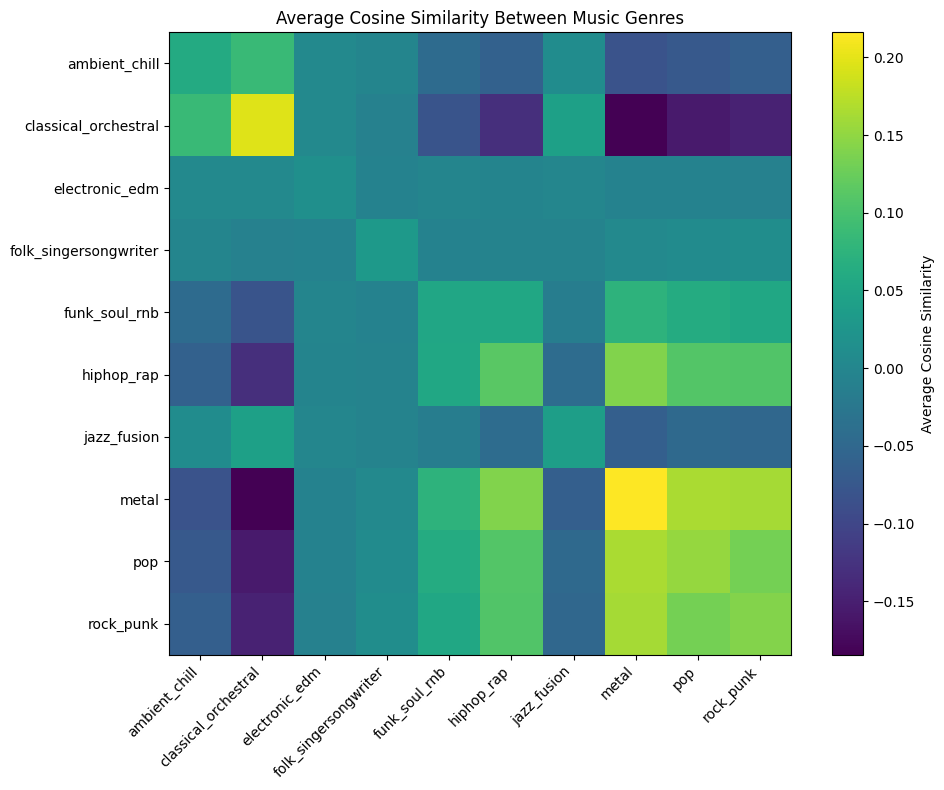

In [20]:
#find similarity scores between genres
from sklearn.metrics.pairwise import cosine_similarity
#first, need to flatten each spectrogram to a 1D array
X_flattened = X_standardized.reshape(X_clipped.shape[0], -1)
#calculate cosine similarity matrix
similarity_matrix = cosine_similarity(X_flattened)
#average similarity scores between genres
genre_labels = balanced_sample['GENRE_1'].values
unique_genres = balanced_sample['GENRE_1'].unique()
genre_similarity = pd.DataFrame(index=unique_genres, columns=unique_genres)
for genre1 in unique_genres:
    for genre2 in unique_genres:
        indices1 = np.where(genre_labels == genre1)[0]
        indices2 = np.where(genre_labels == genre2)[0]
        sim_scores = similarity_matrix[np.ix_(indices1, indices2)]
        avg_sim = np.mean(sim_scores)
        genre_similarity.loc[genre1, genre2] = avg_sim
#convert to numeric
genre_similarity = genre_similarity.astype(float)
#plot heatmap of genre similarity
plt.figure(figsize=(10, 8))
plt.imshow(genre_similarity, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Average Cosine Similarity')
plt.xticks(ticks=np.arange(len(unique_genres)), labels=unique_genres, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(unique_genres)), labels=unique_genres)
plt.title('Average Cosine Similarity Between Music Genres')
plt.tight_layout()
plt.show()